In [17]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load all .text files
folder_path = 'Data'  # <-- CHANGE THIS
files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt')])

data_vectors = []
valid_files = []
misaligned_files = []

for file in files:
    df = pd.read_csv(file, sep='\t')

    # Interpolate missing values
    df_numeric = df.apply(pd.to_numeric, errors='coerce').interpolate(method='linear', limit_direction='both')

    if df_numeric.shape != (1000, 13):
        misaligned_files.append(os.path.basename(file))
        print(f"Skipping {file}, shape mismatch: {df_numeric.shape}")
        continue

    flattened = df_numeric.values.flatten()
    data_vectors.append(flattened)
    valid_files.append(file)

In [18]:
# Convert to NumPy array
X = np.array(data_vectors)
X_scaled = StandardScaler().fit_transform(X)

# --- KMeans on full data
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# --- PCA + KMeans
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans_pca = KMeans(n_clusters=2, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

In [35]:
X_scaled

array([[-0.3181686 ,  0.23874152, -0.27735143, ..., -1.        ,
        -1.        , -1.        ],
       [ 1.67176278,  0.23542686, -0.27735147, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.85952303,  0.16417683, -0.27735075, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.45579273,  0.21331198, -0.2773497 , ..., -1.        ,
        -1.        , -1.        ],
       [-0.48147142,  0.10069294, -0.27734979, ..., -1.        ,
        -1.        , -1.        ],
       [ 0.88209077,  0.11541195, -0.27735024, ...,  1.        ,
         1.        ,  1.        ]])

In [21]:
# --- Combined Cluster Table ---
print("\n📄 Cluster Assignments (Side-by-Side):")
print(f"{'Filename':<30} {'KMeans':>10} {'PCA+KMeans':>15}")
print("-" * 60)
for i, file in enumerate(valid_files):
    print(f"{os.path.basename(file):<30} {clusters_kmeans[i]:>10} {clusters_pca[i]:>15}")

# --- Cluster counts ---
print("\n📊 Cluster Counts")
print(f"{'Method':<15} {'Cluster 0':>10} {'Cluster 1':>10}")
print("-" * 40)
print(f"{'KMeans':<15} {np.sum(clusters_kmeans==0):>10} {np.sum(clusters_kmeans==1):>10}")
print(f"{'PCA+KMeans':<15} {np.sum(clusters_pca==0):>10} {np.sum(clusters_pca==1):>10}")

# --- File grouping ---
cluster0_files = [os.path.basename(valid_files[i]) for i in range(len(clusters_pca)) if clusters_pca[i] == 0]
cluster1_files = [os.path.basename(valid_files[i]) for i in range(len(clusters_pca)) if clusters_pca[i] == 1]

kmeans_cluster0_files = [os.path.basename(valid_files[i]) for i in range(len(clusters_kmeans)) if clusters_kmeans[i] == 0]
kmeans_cluster1_files = [os.path.basename(valid_files[i]) for i in range(len(clusters_kmeans)) if clusters_kmeans[i] == 1]


📄 Cluster Assignments (Side-by-Side):
Filename                           KMeans      PCA+KMeans
------------------------------------------------------------
file_14894.txt                          1               1
file_15229.txt                          0               0
file_15576.txt                          0               0
file_16361.txt                          0               0
file_17860.txt                          1               1
file_18883.txt                          1               1
file_20658.txt                          0               0
file_20726.txt                          0               0
file_20785.txt                          0               0
file_22059.txt                          1               1
file_22620.txt                          0               0
file_22636.txt                          0               0
file_2345.txt                           0               0
file_25611.txt                          0               0
file_26408.txt                

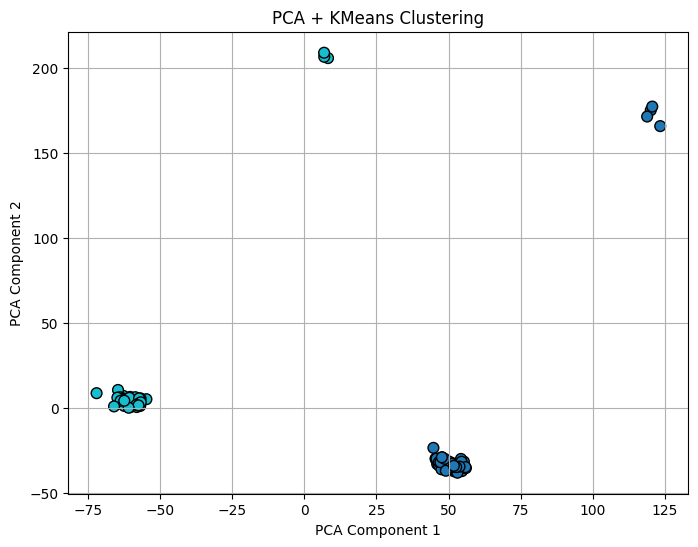

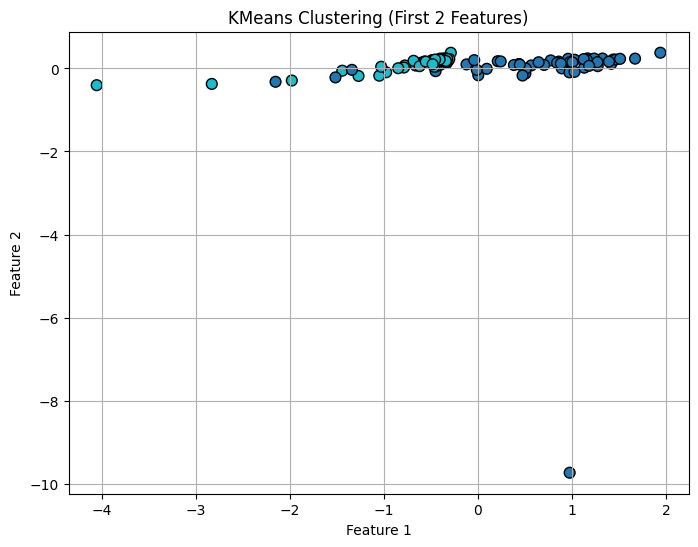

In [22]:
# --- Plot: PCA Projection ---
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='tab10', edgecolor='k', s=60)
plt.title('PCA + KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# --- Plot: First two dimensions of full data ---
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_kmeans, cmap='tab10', edgecolor='k', s=60)
plt.title('KMeans Clustering (First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [23]:
# --- Misaligned files ---
print(f"\n⚠️ Misaligned files skipped: {len(misaligned_files)}")
if misaligned_files:
    print("List of misaligned files:")
    for f in misaligned_files:
        print("  ", f)


⚠️ Misaligned files skipped: 0
